In [2]:
import pandas as pd
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# gender: Female - 0, Male - 1, Other - 2
df = df.replace(to_replace={'gender': {'Female': 0, 'Male': 1, 'Other': 2}})

"""
No Info - 0
current - 1
ever - 2
former - 3
never - 4
not current - 5
other - 6
"""
df = df.replace(to_replace={'smoking_history': {'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5, 'other': 6}})
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_14520\3627634101.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(to_replace={'gender': {'Female': 0, 'Male': 1, 'Other': 2}})
C:\Users\admin\AppData\Local\Temp\ipykernel_14520\3627634101.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(to_replace={'smoking_history': {'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5, 'other': 6}})


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [4]:
diabetes_target = df['diabetes'].to_numpy()
diabetes_data = df.drop('diabetes', axis=1).to_numpy()

In [5]:
# 훈련세트, 테스트세트
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    diabetes_data, diabetes_target, test_size=0.1, random_state=42
)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [7]:
import numpy as np

params = {'max_depth': np.arange(2, 10)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': array([2, 3, ..., 6, 7, 8, 9])}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [8]:
np.mean(gs.cv_results_['mean_test_score'])

np.float64(0.9717180555555556)

In [9]:
dt = gs.best_estimator_

print("훈련세트:", dt.score(train_input, train_target))
print("테스트세트:", dt.score(test_input, test_target))

훈련세트: 0.9717777777777777
테스트세트: 0.9727


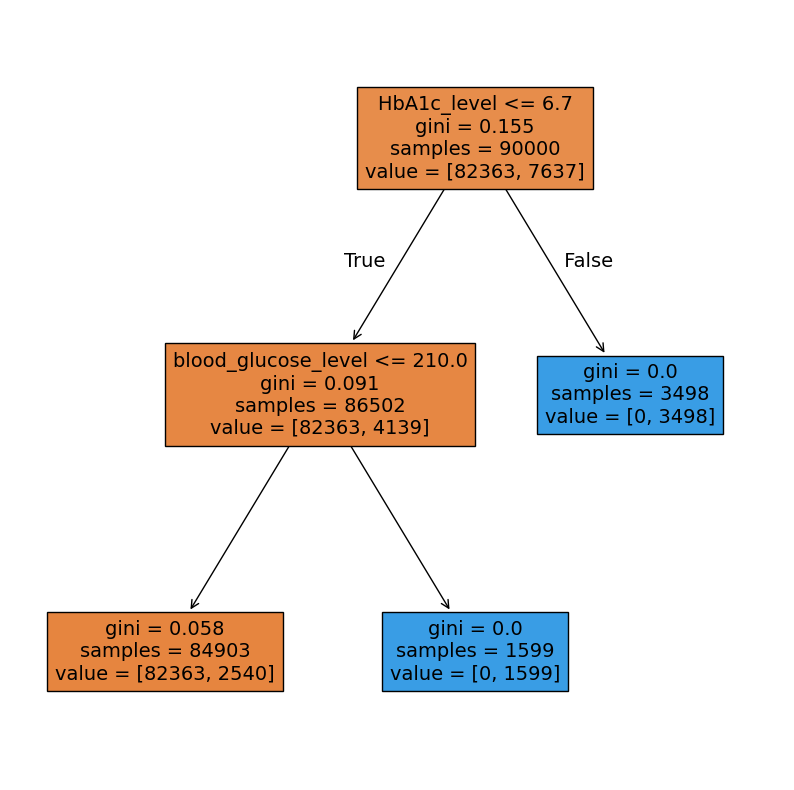

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plot_tree(dt, filled=True, feature_names=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level'])
plt.show()

In [11]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.67359997, 0.32640003])

'HbA1c_level','blood_glucose_level' -> 이 2가지만 가장 중요하다고 판단하고 있다.